# Table of Contents

#### 1. Import libraries and data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [4]:
# create shortcut path
path = r"C:\Users\HP\Documents\09-2024 Agriculture Crop Analysis"

In [5]:
# import data set
df_crop = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'crop_yield.csv'), index_col = False)

## 2. Decision Tree

In [7]:
# changing object variables to one-hot encoding to use in correlation matrix
df_encoded = pd.get_dummies(df_crop, columns = ['Region','Soil_Type', 'Crop', 'Weather_Condition'])

In [8]:
# Assuming 'df_crop' is your DataFrame and 'Yield_tons_per_hectare' is the target variable
X = df_encoded.drop(columns=['Yield_tons_per_hectare'])  # Features
y = df_encoded['Yield_tons_per_hectare']  # Target (yield)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)  # Adjust max_depth as needed

# Train the model
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [10]:
# Make predictions on the test set
y_pred = tree_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 0.2979369817099147
R-squared Score: 0.896655399835329


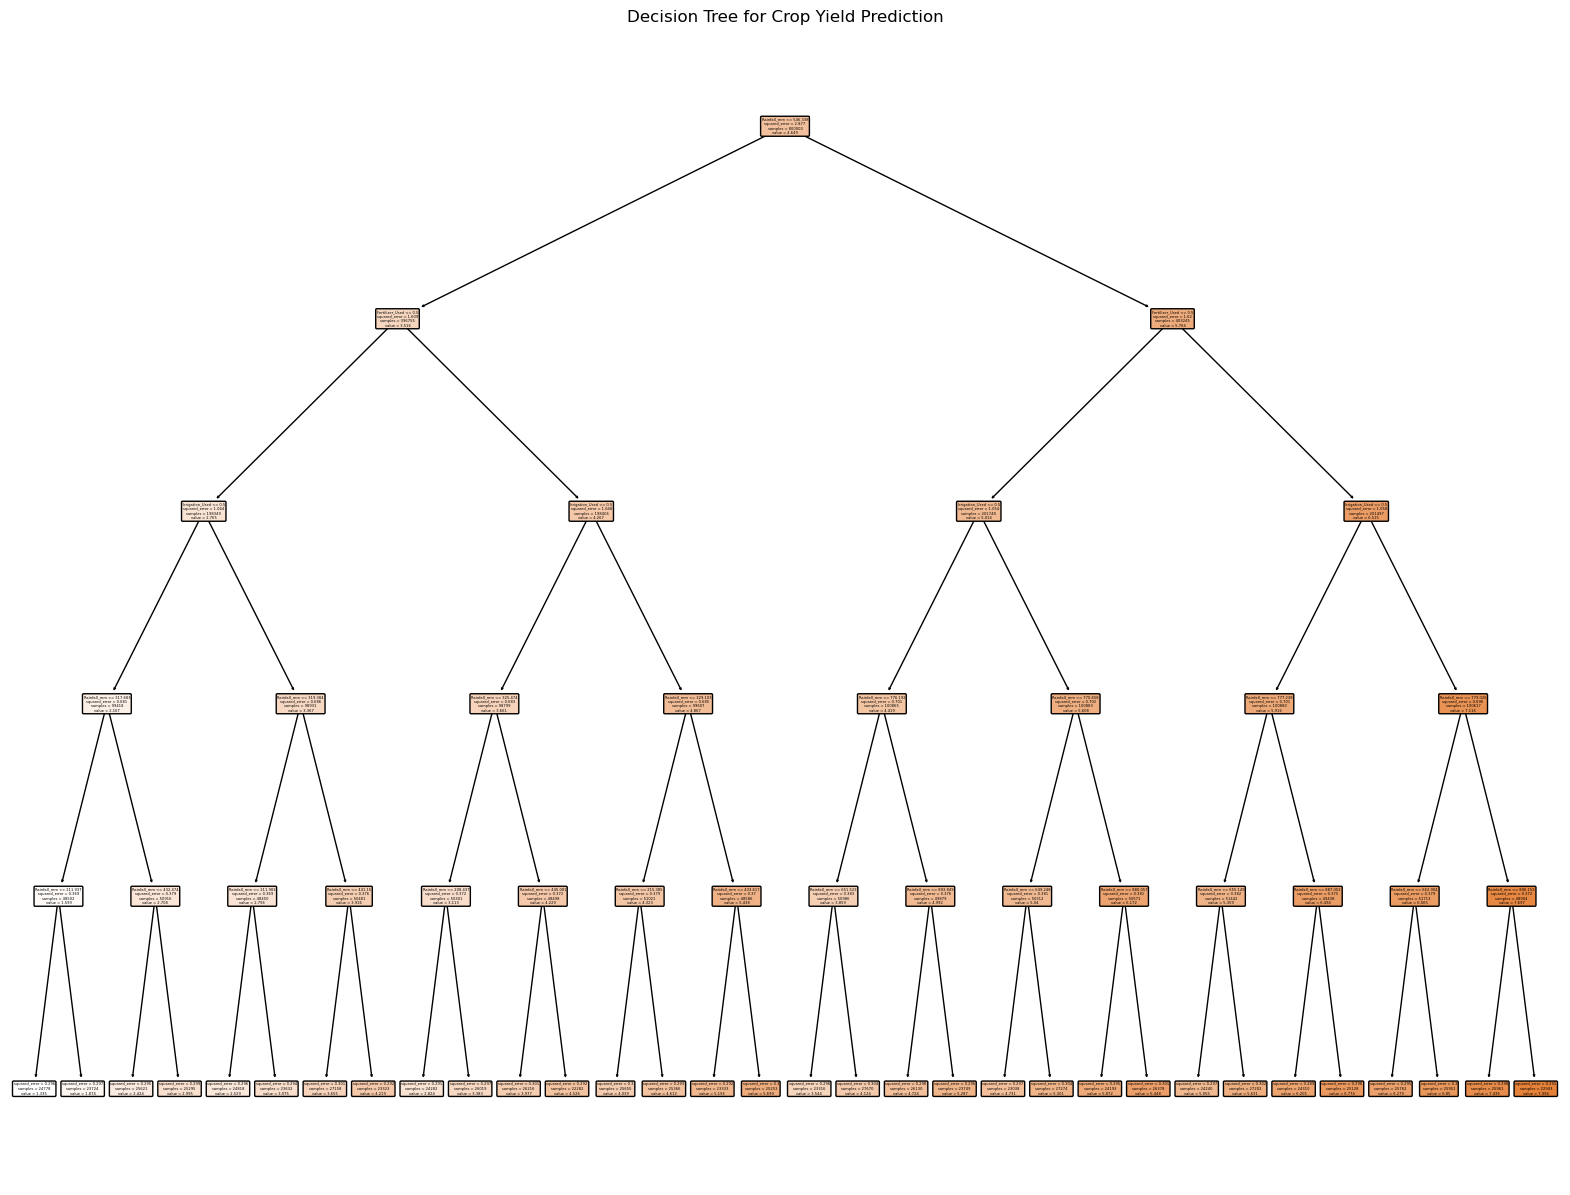

In [11]:
# Plot the decision tree
fig = plt.figure(figsize=(20, 15))
plot_tree(tree_regressor, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree for Crop Yield Prediction")
plt.show()

In [12]:
# Feature importance
importances = tree_regressor.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                     Feature  Importance
0                Rainfall_mm    0.642463
2            Fertilizer_Used    0.218322
3            Irrigation_Used    0.139215
13           Soil_Type_Sandy    0.000000
22   Weather_Condition_Rainy    0.000000
21  Weather_Condition_Cloudy    0.000000
20                Crop_Wheat    0.000000
19              Crop_Soybean    0.000000
18                 Crop_Rice    0.000000
17                Crop_Maize    0.000000
16               Crop_Cotton    0.000000
15               Crop_Barley    0.000000
14            Soil_Type_Silt    0.000000
12           Soil_Type_Peaty    0.000000
1        Temperature_Celsius    0.000000
11            Soil_Type_Loam    0.000000
10            Soil_Type_Clay    0.000000
9           Soil_Type_Chalky    0.000000
8                Region_West    0.000000
7               Region_South    0.000000
6               Region_North    0.000000
5                Region_East    0.000000
4            Days_to_Harvest    0.000000
23   Weather_Con

In [32]:
# Save the figure using the variable `fig`
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'decision_tree.png'))